In [239]:
import pandas as pd
import operator
import time
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [240]:
Final_Data = pd.read_csv('../teis_project-syndrome/data/teis_final_data.csv')

In [241]:
Final_Data['Notification Date'] = pd.to_datetime(Final_Data['Notification Date'])
Final_Data['Notification Date']

0        2018-01-20
1        2016-08-17
2        2016-07-12
3        2016-09-14
4        2016-08-05
            ...    
115519   2022-07-01
115520   2022-07-01
115521   2022-07-01
115522   2022-07-01
115523   2022-07-01
Name: Notification Date, Length: 115524, dtype: datetime64[ns]

In [242]:
Final_Data['DOB'] = pd.to_datetime(Final_Data['DOB'])
Final_Data['DOB']

0        2007-07-07
1        2013-10-15
2        2013-11-13
3        2013-10-01
4        2013-12-04
            ...    
115519   2020-05-20
115520   2021-12-07
115521   2022-06-21
115522   2022-06-17
115523   2019-12-26
Name: DOB, Length: 115524, dtype: datetime64[ns]

In [243]:
TEIS_Exit = Final_Data[['POE', 'Service Coordinator', 'Child ID', 'DOB', 'third_DOB', 'Exit Reason','Exit Date','Child Phase']].fillna(0)
TEIS_Exit

,POE,Service Coordinator,Child ID,DOB,third_DOB,Exit Reason,Exit Date,Child Phase
0,GN,0,104085,2007-07-07,2010-07-07,Unable to contact,2010-01-25,Notification
1,UC,Steven Scarlett,350065,2013-10-15,2016-10-15,Unable to contact,2016-08-31,Screening
2,NW,Rene Bard,351755,2013-11-13,2016-11-13,Ineligible for Part C,2016-08-25,Eligibility
3,FT,Jennifer Terranera - 45 days,353800,2013-10-01,2016-10-01,Referral less than 45 days,2016-09-15,Notification
4,UC,Anna Bolin,353805,2013-12-04,2016-12-04,618 - Part B eligibility not determined,2016-12-03,IFSP
...,...,...,...,...,...,...,...,...
115519,GN,Kim Correll,531592,2020-05-20,0,0,0,Notification
115520,GN,Kim Correll,531593,2021-12-07,0,0,0,Notification
115521,GN,Kim Correll,531594,2022-06-21,0,0,0,Notification
115522,GN,Kim Correll,531595,2022-06-17,0,0,0,Notification


In [244]:
TEIS_Exit = TEIS_Exit[TEIS_Exit['Child Phase']== "IFSP"]
TEIS_Exit

,POE,Service Coordinator,Child ID,DOB,third_DOB,Exit Reason,Exit Date,Child Phase
4,UC,Anna Bolin,353805,2013-12-04,2016-12-04,618 - Part B eligibility not determined,2016-12-03,IFSP
8,ET,Kristi Borer,354276,2013-12-24,2016-12-24,618 - Parent withdraw,2016-09-22,IFSP
15,ET,Karen Stock,358011,2014-02-02,2017-02-02,618 - Part B eligible,2017-02-01,IFSP
16,FT,Jennifer Terranera,358031,2014-01-14,2017-01-14,618 - Part B eligible,2017-01-13,IFSP
18,FT,Kathy Jeffries,358765,2014-02-04,2017-02-04,618 - Part B eligible,2017-02-03,IFSP
...,...,...,...,...,...,...,...,...
114258,NW,Brittany Smith,530139,2020-05-06,0,0,0,IFSP
114296,GN,Katrina Mangrum,530190,2020-12-01,0,0,0,IFSP
114301,SC,Andrea Smith,530196,2020-06-06,0,0,0,IFSP
114319,UC,Candace Peacock,530214,2021-01-12,0,0,0,IFSP


In [245]:
TEIS_Exit = TEIS_Exit[TEIS_Exit['Exit Date'] != 0]
TEIS_Exit

,POE,Service Coordinator,Child ID,DOB,third_DOB,Exit Reason,Exit Date,Child Phase
4,UC,Anna Bolin,353805,2013-12-04,2016-12-04,618 - Part B eligibility not determined,2016-12-03,IFSP
8,ET,Kristi Borer,354276,2013-12-24,2016-12-24,618 - Parent withdraw,2016-09-22,IFSP
15,ET,Karen Stock,358011,2014-02-02,2017-02-02,618 - Part B eligible,2017-02-01,IFSP
16,FT,Jennifer Terranera,358031,2014-01-14,2017-01-14,618 - Part B eligible,2017-01-13,IFSP
18,FT,Kathy Jeffries,358765,2014-02-04,2017-02-04,618 - Part B eligible,2017-02-03,IFSP
...,...,...,...,...,...,...,...,...
112126,SC,Kelly Holt,527606,2021-12-09,2024-12-09,618 - Moved out of state,2022-06-27,IFSP
112129,MD,Torkwase Smith,527609,2019-08-26,2022-08-26,618 - Parent withdraw,2022-06-13,IFSP
112174,SC,Brittney Blalock Rose,527688,2020-04-24,2023-04-24,618 - Parent withdraw,2022-06-08,IFSP
112689,MD,Marian Kingery,528318,2021-09-26,2024-09-26,618 - Attempts to contact unsuccessful,2022-07-01,IFSP


In [247]:
TEIS_Exit_Poe = TEIS_Exit.groupby("POE").count()["Child Phase"]
TEIS_Exit_Poe = TEIS_Exit_Poe.to_frame()
TEIS_Exit_Poe

,Child Phase
POE,
ET,5920
FT,3749
GN,5890
MD,4848
NW,1701
SC,5544
SE,2722
SW,2050
UC,3616


In [248]:
TEIS_Exit_SC = TEIS_Exit.groupby("Service Coordinator").count()["Child Phase"]
TEIS_Exit_SC = TEIS_Exit_SC.to_frame()
TEIS_Exit_SC

,Child Phase
Service Coordinator,
A.J. Cowan,59
Aaron Collins,153
Abigail Gettinger,17
Adrianne McPeake,71
Aleshia Stewart,1
...,...
Virginia Thomas,43
Wendy Burton,214
Wendy Freeman,7


In [249]:
TEIS_Exit_Both = TEIS_Exit.groupby(["POE","Service Coordinator"]).count()["Child Phase"]
TEIS_Exit_Both = TEIS_Exit_Both.to_frame()
TEIS_Exit_Both

Child Phase
POE Service Coordinator             
ET  Aaron Collins                153
    Adrianne McPeake              71
    Amanda Blair                  30
    Amanda Cooke                 112
    Amanda Cooke - PC              5
...                              ...
UC  Nicole Smith                 255
    Sherry Roberts-DS              2
    Steven Scarlett              277
    Taylor Lee                   271
    Taylor Watson                 73

[336 rows x 1 columns]

In [250]:
TEIS_Exit['third_DOB'] = pd.to_datetime(TEIS_Exit['third_DOB'])
TEIS_Exit['third_DOB']

C:\Users\marti\AppData\Local\Temp\ipykernel_18220\2100382324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEIS_Exit['third_DOB'] = pd.to_datetime(TEIS_Exit['third_DOB'])


4        2016-12-04
8        2016-12-24
15       2017-02-02
16       2017-01-14
18       2017-02-04
            ...    
112126   2024-12-09
112129   2022-08-26
112174   2023-04-24
112689   2024-09-26
113003   2023-10-11
Name: third_DOB, Length: 36040, dtype: datetime64[ns]

In [251]:
TEIS_Exit["Exit Date"] = pd.to_datetime(TEIS_Exit['Exit Date'])

C:\Users\marti\AppData\Local\Temp\ipykernel_18220\1525979668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEIS_Exit["Exit Date"] = pd.to_datetime(TEIS_Exit['Exit Date'])


In [252]:
TEIS_Exit["Age of Exit"] = TEIS_Exit["Exit Date"] - TEIS_Exit["DOB"]
TEIS_Exit

C:\Users\marti\AppData\Local\Temp\ipykernel_18220\2633957898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEIS_Exit["Age of Exit"] = TEIS_Exit["Exit Date"] - TEIS_Exit["DOB"]


,POE,Service Coordinator,Child ID,DOB,third_DOB,Exit Reason,Exit Date,Child Phase,Age of Exit
4,UC,Anna Bolin,353805,2013-12-04,2016-12-04,618 - Part B eligibility not determined,2016-12-03,IFSP,1095 days
8,ET,Kristi Borer,354276,2013-12-24,2016-12-24,618 - Parent withdraw,2016-09-22,IFSP,1003 days
15,ET,Karen Stock,358011,2014-02-02,2017-02-02,618 - Part B eligible,2017-02-01,IFSP,1095 days
16,FT,Jennifer Terranera,358031,2014-01-14,2017-01-14,618 - Part B eligible,2017-01-13,IFSP,1095 days
18,FT,Kathy Jeffries,358765,2014-02-04,2017-02-04,618 - Part B eligible,2017-02-03,IFSP,1095 days
...,...,...,...,...,...,...,...,...,...
112126,SC,Kelly Holt,527606,2021-12-09,2024-12-09,618 - Moved out of state,2022-06-27,IFSP,200 days
112129,MD,Torkwase Smith,527609,2019-08-26,2022-08-26,618 - Parent withdraw,2022-06-13,IFSP,1022 days
112174,SC,Brittney Blalock Rose,527688,2020-04-24,2023-04-24,618 - Parent withdraw,2022-06-08,IFSP,775 days
112689,MD,Marian Kingery,528318,2021-09-26,2024-09-26,618 - Attempts to contact unsuccessful,2022-07-01,IFSP,278 days


In [253]:
TEIS_Exit["Age of Exit"] = TEIS_Exit["Age of Exit"].dt.days.astype(int)

C:\Users\marti\AppData\Local\Temp\ipykernel_18220\246842160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEIS_Exit["Age of Exit"] = TEIS_Exit["Age of Exit"].dt.days.astype(int)


In [254]:
TEIS_Exit = TEIS_Exit[TEIS_Exit['Age of Exit']  < 1092]
TEIS_Exit


,POE,Service Coordinator,Child ID,DOB,third_DOB,Exit Reason,Exit Date,Child Phase,Age of Exit
8,ET,Kristi Borer,354276,2013-12-24,2016-12-24,618 - Parent withdraw,2016-09-22,IFSP,1003
52,GN,Jennifer Johnson,364743,2014-03-13,2017-03-13,618 - Parent withdraw,2016-07-08,IFSP,848
57,ET,Cathy Taylor,365848,2014-04-03,2017-04-03,618 - Attempts to contact unsuccessful,2016-10-12,IFSP,923
67,SW,Elizabeth Hailey,368391,2014-06-15,2017-06-15,618 - Attempts to contact unsuccessful,2017-05-23,IFSP,1073
107,UC,Anna Bolin,379122,2014-05-02,2017-05-02,618 - Parent withdraw,2017-04-19,IFSP,1083
...,...,...,...,...,...,...,...,...,...
112126,SC,Kelly Holt,527606,2021-12-09,2024-12-09,618 - Moved out of state,2022-06-27,IFSP,200
112129,MD,Torkwase Smith,527609,2019-08-26,2022-08-26,618 - Parent withdraw,2022-06-13,IFSP,1022
112174,SC,Brittney Blalock Rose,527688,2020-04-24,2023-04-24,618 - Parent withdraw,2022-06-08,IFSP,775
112689,MD,Marian Kingery,528318,2021-09-26,2024-09-26,618 - Attempts to contact unsuccessful,2022-07-01,IFSP,278


In [255]:
TEIS_Exit = TEIS_Exit[TEIS_Exit['Exit Reason']  != "618 - Deceased"]
TEIS_Exit

,POE,Service Coordinator,Child ID,DOB,third_DOB,Exit Reason,Exit Date,Child Phase,Age of Exit
8,ET,Kristi Borer,354276,2013-12-24,2016-12-24,618 - Parent withdraw,2016-09-22,IFSP,1003
52,GN,Jennifer Johnson,364743,2014-03-13,2017-03-13,618 - Parent withdraw,2016-07-08,IFSP,848
57,ET,Cathy Taylor,365848,2014-04-03,2017-04-03,618 - Attempts to contact unsuccessful,2016-10-12,IFSP,923
67,SW,Elizabeth Hailey,368391,2014-06-15,2017-06-15,618 - Attempts to contact unsuccessful,2017-05-23,IFSP,1073
107,UC,Anna Bolin,379122,2014-05-02,2017-05-02,618 - Parent withdraw,2017-04-19,IFSP,1083
...,...,...,...,...,...,...,...,...,...
112126,SC,Kelly Holt,527606,2021-12-09,2024-12-09,618 - Moved out of state,2022-06-27,IFSP,200
112129,MD,Torkwase Smith,527609,2019-08-26,2022-08-26,618 - Parent withdraw,2022-06-13,IFSP,1022
112174,SC,Brittney Blalock Rose,527688,2020-04-24,2023-04-24,618 - Parent withdraw,2022-06-08,IFSP,775
112689,MD,Marian Kingery,528318,2021-09-26,2024-09-26,618 - Attempts to contact unsuccessful,2022-07-01,IFSP,278


In [256]:
TEIS_Exit = TEIS_Exit[TEIS_Exit['Exit Reason']  != "618 - Completion of IFSP/ no longer requires services"]
TEIS_Exit

,POE,Service Coordinator,Child ID,DOB,third_DOB,Exit Reason,Exit Date,Child Phase,Age of Exit
8,ET,Kristi Borer,354276,2013-12-24,2016-12-24,618 - Parent withdraw,2016-09-22,IFSP,1003
52,GN,Jennifer Johnson,364743,2014-03-13,2017-03-13,618 - Parent withdraw,2016-07-08,IFSP,848
57,ET,Cathy Taylor,365848,2014-04-03,2017-04-03,618 - Attempts to contact unsuccessful,2016-10-12,IFSP,923
67,SW,Elizabeth Hailey,368391,2014-06-15,2017-06-15,618 - Attempts to contact unsuccessful,2017-05-23,IFSP,1073
107,UC,Anna Bolin,379122,2014-05-02,2017-05-02,618 - Parent withdraw,2017-04-19,IFSP,1083
...,...,...,...,...,...,...,...,...,...
112126,SC,Kelly Holt,527606,2021-12-09,2024-12-09,618 - Moved out of state,2022-06-27,IFSP,200
112129,MD,Torkwase Smith,527609,2019-08-26,2022-08-26,618 - Parent withdraw,2022-06-13,IFSP,1022
112174,SC,Brittney Blalock Rose,527688,2020-04-24,2023-04-24,618 - Parent withdraw,2022-06-08,IFSP,775
112689,MD,Marian Kingery,528318,2021-09-26,2024-09-26,618 - Attempts to contact unsuccessful,2022-07-01,IFSP,278


In [257]:
TEIS_Exit = TEIS_Exit[TEIS_Exit['Exit Reason']  != "618 - Moved out of state"]
TEIS_Exit

,POE,Service Coordinator,Child ID,DOB,third_DOB,Exit Reason,Exit Date,Child Phase,Age of Exit
8,ET,Kristi Borer,354276,2013-12-24,2016-12-24,618 - Parent withdraw,2016-09-22,IFSP,1003
52,GN,Jennifer Johnson,364743,2014-03-13,2017-03-13,618 - Parent withdraw,2016-07-08,IFSP,848
57,ET,Cathy Taylor,365848,2014-04-03,2017-04-03,618 - Attempts to contact unsuccessful,2016-10-12,IFSP,923
67,SW,Elizabeth Hailey,368391,2014-06-15,2017-06-15,618 - Attempts to contact unsuccessful,2017-05-23,IFSP,1073
107,UC,Anna Bolin,379122,2014-05-02,2017-05-02,618 - Parent withdraw,2017-04-19,IFSP,1083
...,...,...,...,...,...,...,...,...,...
111980,UC,Diane Brewington,527434,2020-01-10,2023-01-10,618 - Parent withdraw,2022-06-09,IFSP,881
112129,MD,Torkwase Smith,527609,2019-08-26,2022-08-26,618 - Parent withdraw,2022-06-13,IFSP,1022
112174,SC,Brittney Blalock Rose,527688,2020-04-24,2023-04-24,618 - Parent withdraw,2022-06-08,IFSP,775
112689,MD,Marian Kingery,528318,2021-09-26,2024-09-26,618 - Attempts to contact unsuccessful,2022-07-01,IFSP,278


In [261]:
TEIS_Exit_Poe2 = TEIS_Exit.groupby("POE").count()["Age of Exit"]
TEIS_Exit_Poe2 = TEIS_Exit_Poe2.to_frame()
TEIS_Exit_Poe2

,Age of Exit
POE,
ET,2389
FT,1434
GN,1849
MD,1785
NW,763
SC,1871
SE,989
SW,1062
UC,1426


In [262]:
TEIS_Exit_SC2 = TEIS_Exit.groupby("Service Coordinator").count()["Age of Exit"]
TEIS_Exit_SC2 = TEIS_Exit_SC2.to_frame()
TEIS_Exit_SC2

,Age of Exit
Service Coordinator,
A.J. Cowan,29
Aaron Collins,68
Abigail Gettinger,9
Adrianne McPeake,37
Aleshia Stewart,1
...,...
Virginia Thomas,15
Wendy Burton,106
Wendy Freeman,2


In [263]:
TEIS_Exit_Both2 = TEIS_Exit.groupby(["POE","Service Coordinator"]).count()["Age of Exit"]
TEIS_Exit_Both2 = TEIS_Exit_Both2.to_frame()
TEIS_Exit_Both2

Age of Exit
POE Service Coordinator             
ET  Aaron Collins                 68
    Adrianne McPeake              37
    Amanda Blair                  19
    Amanda Cooke                  53
    Amanda Cooke - PC              3
...                              ...
UC  Nicole Smith                  80
    Sherry Roberts-DS              2
    Steven Scarlett              132
    Taylor Lee                    80
    Taylor Watson                 43

[315 rows x 1 columns]

In [265]:
TEIS_Exit_Poe_merge = pd.merge(TEIS_Exit_Poe, TEIS_Exit_Poe2, on = ['POE'], how = 'inner')
TEIS_Exit_Poe_merge['Rate of Exit'] = TEIS_Exit_Poe_merge['Age of Exit']/TEIS_Exit_Poe_merge['Child Phase']*100
TEIS_Exit_Poe_merge

,Child Phase,Age of Exit,Rate of Exit
POE,,,
ET,5920,2389,40.354730
FT,3749,1434,38.250200
GN,5890,1849,31.392190
MD,4848,1785,36.819307
NW,1701,763,44.855967
SC,5544,1871,33.748196
SE,2722,989,36.333578
SW,2050,1062,51.804878
UC,3616,1426,39.435841


In [266]:
TEIS_Exit_SC_merge = pd.merge(TEIS_Exit_SC, TEIS_Exit_SC2, on = ['Service Coordinator'], how = 'inner')
TEIS_Exit_SC_merge['Rate of Exit'] = TEIS_Exit_SC_merge['Age of Exit']/TEIS_Exit_SC_merge['Child Phase']*100
TEIS_Exit_SC_merge

,Child Phase,Age of Exit,Rate of Exit
Service Coordinator,,,
A.J. Cowan,59,29,49.152542
Aaron Collins,153,68,44.444444
Abigail Gettinger,17,9,52.941176
Adrianne McPeake,71,37,52.112676
Aleshia Stewart,1,1,100.000000
...,...,...,...
Virginia Thomas,43,15,34.883721
Wendy Burton,214,106,49.532710
Wendy Freeman,7,2,28.571429


In [267]:
TEIS_Exit_Both_merge = pd.merge(TEIS_Exit_Both, TEIS_Exit_Both2, on = ['POE','Service Coordinator'], how = 'inner')
TEIS_Exit_Both_merge['Rate of Exit'] = TEIS_Exit_Both_merge['Age of Exit']/TEIS_Exit_Both_merge['Child Phase']*100
TEIS_Exit_Both_merge

Child Phase  Age of Exit  Rate of Exit
POE Service Coordinator                                        
ET  Aaron Collins                153           68     44.444444
    Adrianne McPeake              71           37     52.112676
    Amanda Blair                  30           19     63.333333
    Amanda Cooke                 112           53     47.321429
    Amanda Cooke - PC              5            3     60.000000
...                              ...          ...           ...
UC  Nicole Smith                 255           80     31.372549
    Sherry Roberts-DS              2            2    100.000000
    Steven Scarlett              277          132     47.653430
    Taylor Lee                   271           80     29.520295
    Taylor Watson                 73           43     58.904110

[315 rows x 3 columns]

In [277]:
TEIS_Exit_Poe_merge.sort_values(by = 'Rate of Exit').round(decimals =2)

,Child Phase,Age of Exit,Rate of Exit
POE,,,
GN,5890,1849,31.39
SC,5544,1871,33.75
SE,2722,989,36.33
MD,4848,1785,36.82
FT,3749,1434,38.25
UC,3616,1426,39.44
ET,5920,2389,40.35
NW,1701,763,44.86
SW,2050,1062,51.80


In [278]:
TEIS_Exit_SC_merge.sort_values(by = 'Rate of Exit').round(decimals =2)

,Child Phase,Age of Exit,Rate of Exit
Service Coordinator,,,
Kimberly KetronPC,23,1,4.35
Elizabeth Smith,10,1,10.00
Kendra Wurm,40,4,10.00
Merissa Leavitt,156,19,12.18
Deanna Pippin,8,1,12.50
...,...,...,...
Jeanna McCloud,1,1,100.00
Aleshia Stewart,1,1,100.00
Jennifer Nicely,1,1,100.00


In [281]:
TEIS_Exit_Poe_merge =TEIS_Exit_Poe_merge.sort_values(by = 'Rate of Exit').round(decimals =2)
TEIS_Exit_Poe_merge

,Child Phase,Age of Exit,Rate of Exit
POE,,,
GN,5890,1849,31.39
SC,5544,1871,33.75
SE,2722,989,36.33
MD,4848,1785,36.82
FT,3749,1434,38.25
UC,3616,1426,39.44
ET,5920,2389,40.35
NW,1701,763,44.86
SW,2050,1062,51.80


In [295]:
TEIS_Exit_Poe_merge = TEIS_Exit_Poe_merge.rename(columns={"Child Phase": "All Exits", "Age of Exit": "Early Exits"})

In [301]:
TEIS_Exit_Poe_merge = TEIS_Exit_Poe_merge[['Early Exits', 'All Exits', 'Rate of Exit']]
TEIS_Exit_Poe_merge

,Early Exits,All Exits,Rate of Exit
POE,,,
GN,1849,5890,31.39
SC,1871,5544,33.75
SE,989,2722,36.33
MD,1785,4848,36.82
FT,1434,3749,38.25
UC,1426,3616,39.44
ET,2389,5920,40.35
NW,763,1701,44.86
SW,1062,2050,51.80


<AxesSubplot:xlabel='POE'>

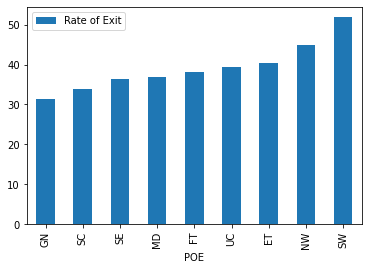

In [307]:
TEIS_Exit_Poe_merge.plot.bar( y= 'Rate of Exit')

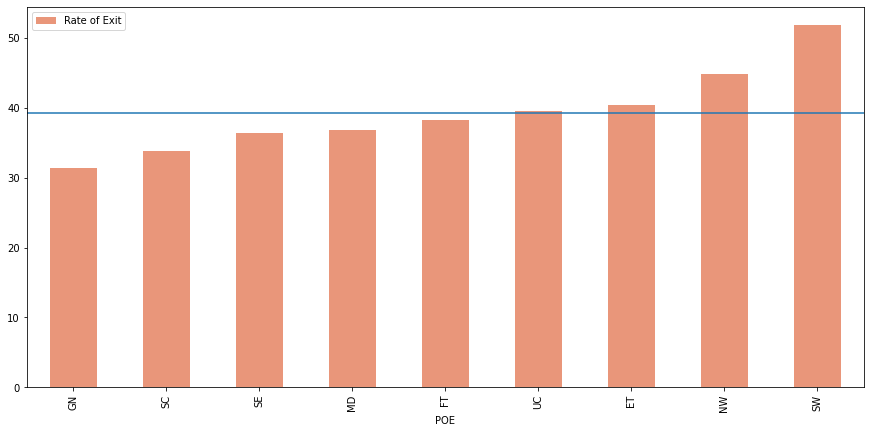

In [313]:
fig,ax= plt.subplots()

TEIS_Exit_Poe_merge.plot(y ='Rate of Exit',kind="bar", ax=ax, color='darksalmon',figsize=(15,7))
Exit_mean = TEIS_Exit_Poe_merge["Rate of Exit"].mean()
ax.axhline(Exit_mean)

In [315]:
TEIS_Exit_SC_merge = TEIS_Exit_SC_merge.sort_values(by = 'Rate of Exit').round(decimals =2)
TEIS_Exit_SC_merge

,Child Phase,Age of Exit,Rate of Exit
Service Coordinator,,,
Kimberly KetronPC,23,1,4.35
Elizabeth Smith,10,1,10.00
Kendra Wurm,40,4,10.00
Merissa Leavitt,156,19,12.18
Deanna Pippin,8,1,12.50
...,...,...,...
Jeanna McCloud,1,1,100.00
Aleshia Stewart,1,1,100.00
Jennifer Nicely,1,1,100.00


In [316]:
##TEIS_Exit = TEIS_Exit[TEIS_Exit['Exit Reason']  != "618 - Completion of IFSP/ no longer requires services"]
TEIS_Exit_SC_merge = TEIS_Exit_SC_merge[TEIS_Exit_SC_merge["Child Phase"]> 3]
TEIS_Exit_SC_merge

,Child Phase,Age of Exit,Rate of Exit
Service Coordinator,,,
Kimberly KetronPC,23,1,4.35
Elizabeth Smith,10,1,10.00
Kendra Wurm,40,4,10.00
Merissa Leavitt,156,19,12.18
Deanna Pippin,8,1,12.50
...,...,...,...
John Hall,6,5,83.33
Marian Kingery,55,48,87.27
Lamar Meaders,8,7,87.50


In [317]:
TEIS_Exit_SC_merge = TEIS_Exit_SC_merge.rename(columns={"Child Phase": "All Exits", "Age of Exit": "Early Exits"})

In [321]:
TEIS_Exit_SC_merge = TEIS_Exit_SC_merge[['Early Exits', 'All Exits', 'Rate of Exit']]
TEIS_Exit_SC_merge.sort_values(by = 'Rate of Exit')    .agg(['mean', 'std', 'median', 'max'])

,Early Exits,All Exits,Rate of Exit
Service Coordinator,,,
Kimberly KetronPC,1,23,4.35
Elizabeth Smith,1,10,10.00
Kendra Wurm,4,40,10.00
Merissa Leavitt,19,156,12.18
Deanna Pippin,1,8,12.50
...,...,...,...
John Hall,5,6,83.33
Marian Kingery,48,55,87.27
Lamar Meaders,7,8,87.50


In [331]:
TEIS_Exit_SC_merge_top8 =TEIS_Exit_SC_merge.head(8)
TEIS_Exit_SC_merge_top8

,Early Exits,All Exits,Rate of Exit
Service Coordinator,,,
Kimberly KetronPC,1,23,4.35
Elizabeth Smith,1,10,10.00
Kendra Wurm,4,40,10.00
Merissa Leavitt,19,156,12.18
Deanna Pippin,1,8,12.50
Amber Wilkes,1,7,14.29
Kimberly J. Johnson,3,20,15.00
Katie Flowers,5,31,16.13


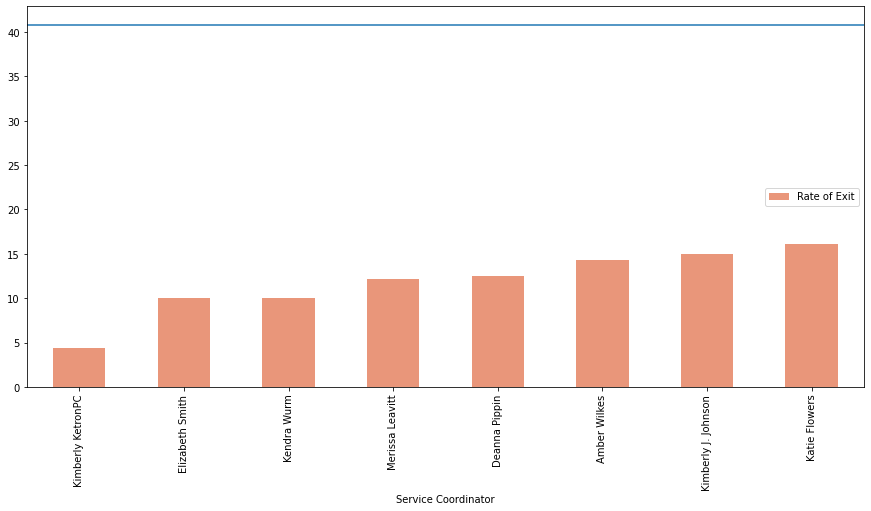

In [343]:
fig,ax= plt.subplots()

TEIS_Exit_SC_merge_top8.plot(y='Rate of Exit',kind="bar", ax=ax, color='darksalmon',figsize=(15,7))
Exit_mean = TEIS_Exit_SC_merge["Rate of Exit"].mean()
ax.axhline(Exit_mean)

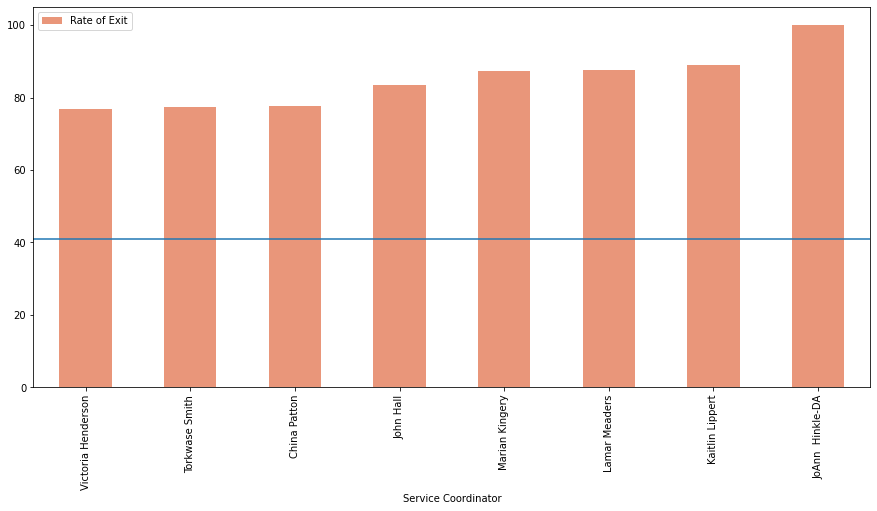

In [347]:
fig,ax= plt.subplots()

TEIS_Exit_SC_merge_bot8.plot(y='Rate of Exit',kind="bar", ax=ax, color='darksalmon',figsize=(15,7))
Exit_mean = TEIS_Exit_SC_merge["Rate of Exit"].mean()
ax.axhline(Exit_mean)

In [341]:
TEIS_Exit_SC_merge.agg(['mean', 'std', 'median', 'max'])

,Early Exits,All Exits,Rate of Exit
mean,47.342657,125.748252,40.848322
std,39.772971,102.712337,15.729497
median,37.500000,99.000000,37.955000
max,214.000000,415.000000,100.000000


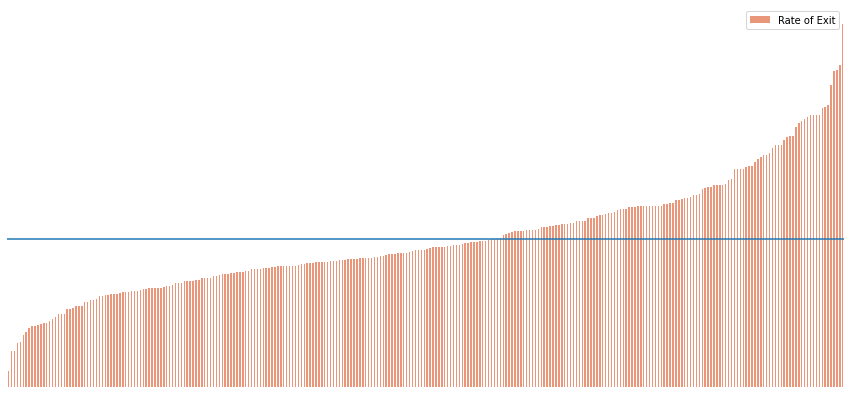

In [379]:
fig,ax= plt.subplots()

TEIS_Exit_SC_merge.plot(y='Rate of Exit', ax=ax, kind="bar", color='darksalmon',figsize=(15,7))
plt.axis("off")
Exit_mean = TEIS_Exit_SC_merge["Rate of Exit"].mean()
ax.axhline(Exit_mean)

In [356]:
TEIS_Exit_Both_merge

Child Phase  Age of Exit  Rate of Exit
POE Service Coordinator                                        
ET  Aaron Collins                153           68     44.444444
    Adrianne McPeake              71           37     52.112676
    Amanda Blair                  30           19     63.333333
    Amanda Cooke                 112           53     47.321429
    Amanda Cooke - PC              5            3     60.000000
...                              ...          ...           ...
UC  Nicole Smith                 255           80     31.372549
    Sherry Roberts-DS              2            2    100.000000
    Steven Scarlett              277          132     47.653430
    Taylor Lee                   271           80     29.520295
    Taylor Watson                 73           43     58.904110

[315 rows x 3 columns]